In [1]:
import pandas as pd
import numpy as np

In [2]:
from plotnine import *

In [3]:
train = pd.read_csv('all/train.csv')
train.shape

(891, 12)

In [4]:
test = pd.read_csv('all/test.csv')
test.shape

(418, 11)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train['Age_mean'] = train['Age']
train['Age_mean'].fillna(train['Age'].mean(), inplace = True)

In [10]:
test['Age_mean'] = test['Age']
test['Age_mean'].fillna(test['Age'].mean(), inplace = True)

In [11]:
train['Age'].isnull().sum()

177

In [12]:
train['Age_mean'].isnull().sum()

0

In [13]:
train['Age_mean'].mean()

29.699117647058763

In [14]:
train['Age'].mean()

29.69911764705882

# One-Hot_Encoding

In [15]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
train['Gender'] = (train['Sex'] == 'female')  # 조건이 하나일 때는 괄호 안 쳐줘도 상관 없음. 여러개일 때는 괄호 쳐줘야

In [17]:
test['Gender'] = (test['Sex'] == 'female')

In [18]:
train['Gender'].head()

0    False
1     True
2     True
3     True
4    False
Name: Gender, dtype: bool

In [19]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
train['Embarked'].isnull().sum()

2

In [21]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [22]:
test['Embarked'].isnull().sum()

0

In [23]:
train['Embarked_S'] = train['Embarked'] == 'S'
train['Embarked_C'] = train['Embarked'] == 'C'
train['Embarked_Q'] = train['Embarked'] == 'Q'

In [24]:
train['Embarked_S'].head()

0     True
1    False
2     True
3     True
4     True
Name: Embarked_S, dtype: bool

In [25]:
train['Embarked_S'].sum()

644

In [26]:
train['Embarked_C'].sum()

168

In [27]:
train['Embarked_Q'].sum()

77

In [28]:
train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [29]:
test['Embarked_S'] = test['Embarked'] == 'S'
test['Embarked_C'] = test['Embarked'] == 'C'
test['Embarked_Q'] = test['Embarked'] == 'Q'

# 가족 수 구하기

In [30]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [31]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [32]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [33]:
train['Family'] = train['FamilySize']
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize'] < 5),'Family'] = 'M'
train.loc[train['FamilySize'] > 4, 'Family'] = 'L'

In [34]:
train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [35]:
train['Family_S'] = train['Family'] == 'S'
train['Family_M'] = train['Family'] == 'M'
train['Family_L'] = train['Family'] == 'L'

In [36]:
train[['FamilySize', 'Family', 'Family_S', 'Family_M', 'Family_L']].head()

,FamilySize,Family,Family_S,Family_M,Family_L
0,2,M,False,True,False
1,2,M,False,True,False
2,1,S,True,False,False
3,2,M,False,True,False
4,1,S,True,False,False


In [37]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Family'] = test['FamilySize']
test.loc[test['FamilySize'] == 1, 'Family'] = 'S'
test.loc[(test['FamilySize'] > 1) & (test['FamilySize'] < 5),'Family'] = 'M'
test.loc[test['FamilySize'] > 4, 'Family'] = 'L'

In [38]:
test['Family_S'] = test['Family'] == 'S'
test['Family_M'] = test['Family'] == 'M'
test['Family_L'] = test['Family'] == 'L'

In [39]:
train['Family'].value_counts()

S    537
M    292
L     62
Name: Family, dtype: int64

In [65]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

# Fare binning

In [89]:
train['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [91]:
train['Fare_mean'] = train['Fare']
train['Fare_mean'].fillna(train['Fare'].mean(), inplace = True)

In [94]:
test['Fare_mean'] = test['Fare']
test['Fare_mean'].fillna(test['Fare'].mean(), inplace = True)

In [92]:
train['Fare'].isnull().sum()

0

In [93]:
train['Fare_mean'].isnull().sum()

0

In [95]:
train['Fare_mean'].mean()

32.2042079685746

In [96]:
train['Fare'].mean()

32.2042079685746

In [97]:
# train['Fare'] = train['FareValue']
# train.loc[train['FareValue'] <= 10, 'Fare'] = 'low'
# train.loc[(train['FareValue'] > 10) & (train['FareValue'] < 20),'Fare'] = 'middle'
# train.loc[train['FareValue'] > 20, 'Fare'] = 'high'

KeyError: 'FareValue'

# p-class one-hot encoding

In [55]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [56]:
train['Pclass_1'] = train['Pclass'] == 1
train['Pclass_2'] = train['Pclass'] == 2
train['Pclass_3'] = train['Pclass'] == 3

In [57]:
train[['Pclass', 'Pclass_1', 'Pclass_2', 'Pclass_3']].head()

,Pclass,Pclass_1,Pclass_2,Pclass_3
0,3,False,False,True
1,1,True,False,False
2,3,False,False,True
3,1,True,False,False
4,3,False,False,True


In [66]:
test['Pclass_1'] = test['Pclass'] == 1
test['Pclass_2'] = test['Pclass'] == 2
test['Pclass_3'] = test['Pclass'] == 3

# Feature Selection

In [60]:
feature_names = ['Gender', 'Age_mean', 
                 'Embarked_S', 'Embarked_C', 'Embarked_Q', 
                 'Family_S', 'Family_M', 'Family_L',
                 'Pclass_1', 'Pclass_2', 'Pclass_3']

In [61]:
X_train = train[feature_names]
X_train.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L,Pclass_1,Pclass_2,Pclass_3
0,False,22.0,True,False,False,False,True,False,False,False,True
1,True,38.0,False,True,False,False,True,False,True,False,False
2,True,26.0,True,False,False,True,False,False,False,False,True
3,True,35.0,True,False,False,False,True,False,True,False,False
4,False,35.0,True,False,False,True,False,False,False,False,True


In [62]:
y_label = train['Survived']

In [67]:
X_test = test[feature_names]
X_test.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L,Pclass_1,Pclass_2,Pclass_3
0,False,34.5,False,False,True,True,False,False,False,False,True
1,True,47.0,True,False,False,False,True,False,False,False,True
2,False,62.0,False,False,True,True,False,False,False,True,False
3,False,27.0,True,False,False,True,False,False,False,False,True
4,True,22.0,True,False,False,False,True,False,False,False,True


In [68]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family',
       'Family_S', 'Family_M', 'Family_L', 'Survived', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [75]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6, random_state=2018)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [76]:
model.fit(X_train, y_label)
prediction = model.predict(X_test)

In [77]:
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
test['Survived'] = prediction

In [79]:
import os
os.environ["PATH"] += os.pathsep + r'/Users/yunkim/anaconda3/pkgs/graphviz-2.40.1-h0a44026_0/bin'

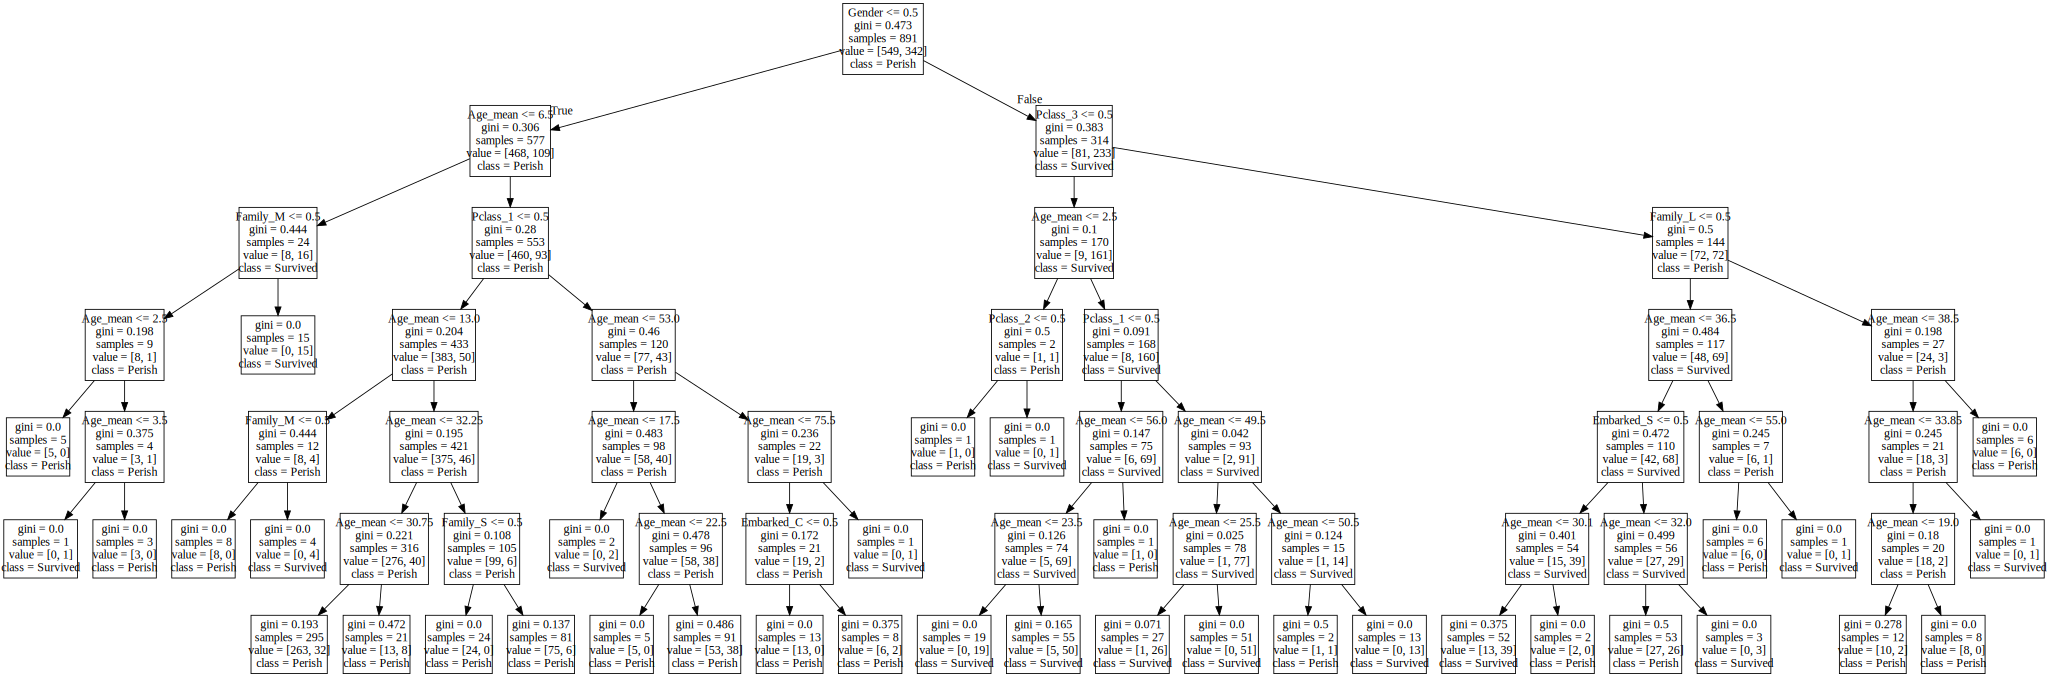

In [80]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [69]:
submissions = test[['PassengerId', 'Survived']]
submissions.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [85]:
submissions.to_csv('submissions/submit.csv', index=False)

In [81]:
score = round(model.score(X_train, y_label)*100, 2)

# 평가하기

In [84]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=2018)

scoring = 'accuracy'
score = cross_val_score(model, X_train, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.81111111 0.83146067 0.87640449 0.83146067 0.82022472 0.74157303
 0.80898876 0.85393258 0.70786517 0.76404494]


80.47